In [51]:
# This python will be used to predict stock price.
# Time series analysis will be used in order to make the prediction.
# Time series analysis can be useful to see how stock price changes over time.
# A time series can be taken on any variable that changes over time.


In [52]:
# Tools that will be used in this project
  # Python
  # Jupyter Notebooks
  # Markdown (still need to learn)
  # Pandas
  # matplotlib
  # Numpy
  # Scikit Learn
  # Time Series Analysis
  # Web Scrapping (Still need to learn Beautiful Soup)


In [84]:
# import the required python libraries to use.
import numpy as np # Python is used for working with arrays.
import pandas as pd # Pandas is used to analyze data.
import matplotlib.pyplot as plt #for plotting the data 
# Diplay the plots in the jupyter notebooks
%matplotlib inline 
# Specify the style sheet to use
plt.style.use('seaborn')
# Module supplies classes for manipulating dates and times.
from datetime import datetime, timedelta
# Matplotlib.dates provides sophisticated date plotting capabilities
import matplotlib.dates as mpl_dates 
# Transform features by scaling each feature to a given range
from sklearn.preprocessing import MinMaxScaler


In [102]:
# Data to be used.
# We will use BeautifulSoup to obtain the JSE data to use for this project
# Currently the Data is not avaible and we will use Yahoo Finance Data for google stock

# Stock data from Yahoo Finance
link = "https://query1.finance.yahoo.com/v7/finance/download/GOOG?period1=1603054888&period2=1634590888&interval=1d&events=history&includeAdjustedClose=true"

#Reading the CSV data into a pandas data dataframe
goog = pd.read_csv(link)
# Reading the firt few lines of the data
goog.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-10-19,1580.459961,1588.150024,1528.000000,1534.609985,1534.609985,1607100
1,2020-10-20,1527.050049,1577.500000,1525.670044,1555.930054,1555.930054,2241700
2,2020-10-21,1573.329956,1618.729980,1571.630005,1593.310059,1593.310059,2568300
3,2020-10-22,1593.050049,1621.989990,1585.000000,1615.329956,1615.329956,1433600
4,2020-10-23,1626.069946,1642.359985,1620.510010,1641.000000,1641.000000,1375800


In [55]:
#Check the shape of the data
rows = goog.shape[0]
columns = goog.shape[1]
print(f'The data contains {rows} rows and {columns} columns.')

The data contains 252 rows and 7 columns.


In [64]:
# Drop unnecessary columns

# We will currently use the date and the CLose price to build our initial programe.
google = goog[['Date', 'Close']]
#Drop Date column
#google_close = google.drop('Date', axis = 1)
#google_close = google_close.reset_index(drop = True)
google.head()

,Date,Close
0,2020-10-19,1534.609985
1,2020-10-20,1555.930054
2,2020-10-21,1593.310059
3,2020-10-22,1615.329956
4,2020-10-23,1641.000000


In [106]:
google_N = google.copy()
Close_N = google_N.Close.to_numpy()



(252,)

In [107]:
# A way to normalize the input features/variables is the Min-Max scaler. 
# By doing so, all features will be transformed into the range [0,1] meaning 
# that the minimum and maximum value of a feature/variable is going to be 0 and 1, respectively.
# module has been imported above
# from sklearn.preprocessing import MinMaxScaler

# Create the instance of the class
scaler = MinMaxScaler(feature_range=(0, 1))
# create a copy of the data to perform scaling on
google_N = google.copy()

# Generally, scikit-learn works on any numeric data stored as numpy arrays or scipy sparse matrices. 
# Other types that are convertible to numeric arrays such as pandas DataFrame are also acceptable.

# Create a variable with the values in the Close Column converted to a numpy array
# This will return a numpy arrany with 1 dimension (checked using Close_N.ndim)
Close_N = google_N.Close.to_numpy()
# Reshape is used to give a new shape to an array without changing its data.
# Scikit-learn has been built to expect array shapes that both represent 
  # (1) the number of samples and 
  # (2) the dimensionality and hence number of features in each sample.
# We have 1 feature in this case and multiple samples (-1)
Close_N = Close_N.reshape(-1, 1)
# Fit to data, then transform it.
Close_N = scaler.fit_transform(X)
# Add the normalized close column to the dataset
google_N["Close_N"] = Close_N
google_N.head()


,Date,Close,Close_N
0,2020-10-19,1534.609985,0.012848
1,2020-10-20,1555.930054,0.028074
2,2020-10-21,1593.310059,0.054770
3,2020-10-22,1615.329956,0.070496
4,2020-10-23,1641.000000,0.088829


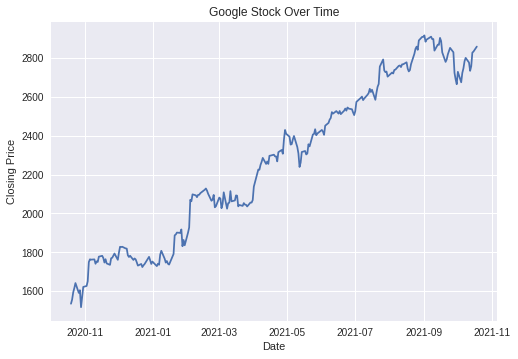

In [117]:
#fixing the dates for plotting
googleN['Date'] = pd.to_datetime(google['Date'])
googleN = googleN.sort_values('Date')

#Assign values for plotting
price_close = googleN['Close']
price_date = googleN['Date']

# Plotting the data
plt.plot(price_date, price_close)
plt.title('Google Stock Over Time') # Set the title
plt.xlabel('Date') # Set the X-axis label
plt.ylabel('Closing Price') # Set the y - axis label
plt.show() # show the plot

In [97]:
googleN.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252 entries, 0 to 251
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     252 non-null    datetime64[ns]
 1   Close    252 non-null    float64       
 2   Close_N  252 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 7.9 KB
